<a href="https://colab.research.google.com/github/leslie1506/ProyectoU1/blob/main/PROYECTOUNIDAD1les.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

233.55466666666666
21794977852.0
2207082.8
coeficiente de correlacion= 0.9782
coeficiente de correlacion (forma facil)=                  Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000
coeficiente de correlacion PearsonRResult(statistic=np.float64(0.9782416184887598), pvalue=np.float64(1.1430681092271562e-20))
0.9569566641435082
PearsonRResult(statistic=np.float64(0.9782416184887598), pvalue=np.float64(1.1430681092271562e-20))
parametros: const              24848.203967
YearsExperience     9449.962321
dtype: float64


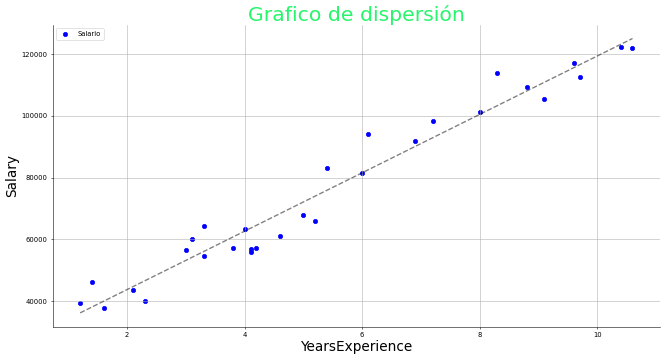


Coeficiente de determinafion= 0.957

 intervalo de confianza:                             0             1
const            20123.238035  29573.169898
YearsExperience   8674.118747  10225.805896


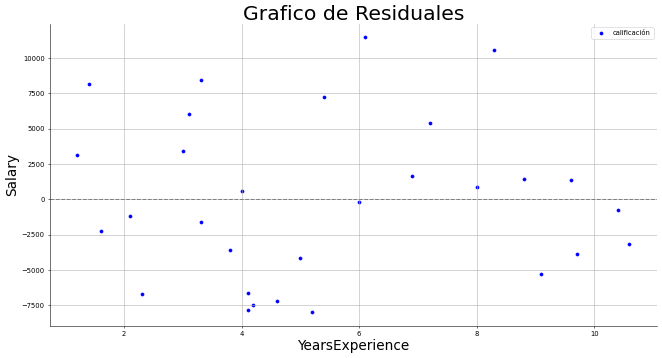

valor_p(shapiro)=  0.1952218633400829
valor_p de Breusch-Pagan: 0.5276

x=70, [686345.56646838]
x=80, [780845.18968293]
x=84, [818645.03896875]

Ultimo paso


,df,sum_sq,mean_sq,F,PR(>F)
Salary,1.0,223.501695,223.501695,622.507203,1.143068e-20
Residual,28.0,10.052972,0.359035,NaN,NaN


In [ ]:
import pandas as pd

# Cargar datos del CSV
df = pd.read_csv("https://raw.githubusercontent.com/leslie1506/ProyectoU1/refs/heads/main/student_exam_scores.csv")
df.head()

# Establezca la variable dependiente (Y) y la independiente (X)
x = df["Hours"]
y = df["Scores"]

# Gráfico de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, y, label="Scores", color="blue", s=40)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.title("Gráfico de dispersión", color="#27F56C", fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.show()

# Calcule el coeficiente de correlación
Sxx = ((x - x.mean())**2).sum()
Syy = ((y - y.mean())**2).sum()
Sxy = ((x - x.mean())*(y-y.mean())).sum()

from math import sqrt
r = Sxy/sqrt(Sxx*Syy)
print("Coeficiente de correlación =", round(r,4))
print("Coeficiente de correlación (forma fácil)=", df.corr())

from scipy.stats import pearsonr
print("Coeficiente de correlación:", pearsonr(x,y))
print("Coeficiente de determinación:", r**2)

# Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
print("Parámetros:", modelo.params)

yc = modelo.predict(x_constante)
plt.scatter(x, y, label="Datos", color="blue", s=40)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5, label="Recta ajustada")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regresión Lineal")
plt.legend()
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,yc)
print("\nCoeficiente de determinación (R²) =", round(r2,4))

# Intervalo de confianza
intervalo_de_confianza = modelo.conf_int(alpha=0.05)
print("\nIntervalo de confianza:", intervalo_de_confianza)

# Gráfico de residuales
residuales = modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, residuales, label="Residuales", color="blue", s=20)
plt.xlabel("Hours")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales", fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.axhline(y=0, color="gray", linestyle="--")
plt.show()

# Test de Shapiro (normalidad de los residuales)
from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro = shapiro(residuales)
print("Valor p (Shapiro) =", valor_p_shapiro)

# Test de Breusch-Pagan (homocedasticidad)
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f"Valor p de Breusch-Pagan: {valor_p_bp:0.4f}\n")

# Predicciones de ejemplo
print("Predicción para x=5:", modelo.predict([1,5]))
print("Predicción para x=8:", modelo.predict([1,8]))

# ANOVA
from statsmodels.formula.api import ols
modelo_lineal = ols("Scores ~ Hours", data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
print("\nANOVA:")
print(tabla_anova)